In [96]:
import pandas as pd
import numpy as np
from operator import attrgetter
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import requests
from urllib.parse import urlencode

In [97]:
def url_ydisk (url):
    
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    public_key = url

    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']

    return download_url

In [98]:
# Чтение данных из файлов
customers = pd.read_csv(url_ydisk('https://disk.yandex.ru/d/QXrVDUoQvFhIcg'))
orders = pd.read_csv(url_ydisk('https://disk.yandex.ru/d/0zWmh1bYP6REbw'), 
                     parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                                  'order_delivered_customer_date', 'order_estimated_delivery_date'])
order_items = pd.read_csv(url_ydisk('https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'))

### olist_customers_dataset.csv — таблица с уникальными идентификаторами пользователей

customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

### olist_orders_dataset.csv —  таблица заказов

order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

### olist_order_items_dataset.csv —  товарные позиции, входящие в заказы

order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

### Уникальные статусы заказов в таблице olist_orders_dataset:

created —  создан

approved —  подтверждён

invoiced —  выставлен счёт

processing —  в процессе сборки заказа

shipped —  отгружен со склада

delivered —  доставлен пользователю

unavailable —  недоступен

canceled —  отменён

In [99]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [100]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [101]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [102]:
# Проверка типов данных в таблице с датами
orders.dtypes 

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [103]:
# Проверка статусов заказов
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [104]:
# Проверка значений NaN
customers.isna().sum() 

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [105]:
# Проверка значений NaN
orders.isna().sum() 

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [106]:
# Проверка значений NaN
order_items.isna().sum() 

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [107]:
# Проверка на дубликаты
customers.duplicated().sum()

0

In [108]:
# Проверка на дубликаты
orders.duplicated().sum()

0

In [109]:
# Проверка на дубликаты
order_items.duplicated().sum()

0

### 1. Сколько у нас пользователей, которые совершили покупку только один раз? 

Чтобы определить, что считать покупкой, важно учесть статус заказа. Только заказы со статусом "delivered" можно считать полноценной покупкой, так как товар был успешно доставлен клиенту. 

In [110]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [111]:
# Объединение таблиц customers и orders по customer_id
merged_df = customers.merge(orders, on='customer_id')

In [112]:
# Данные с доставленными заказами
delivered_orders = merged_df.query('order_status == "delivered"')
delivered_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [113]:
# Количество заказов для каждого пользователя
num_orders = delivered_orders.groupby('customer_unique_id') \
    .agg({'order_id':'count'}) \
    .rename(columns={'order_id':'num_orders'}) \
    .query('num_orders == 1')

In [114]:
print(f'Количество пользователей, которые совершили покупку только один раз: {num_orders.shape[0]}')

Количество пользователей, которые совершили покупку только один раз: 90557


### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

In [115]:
# Фильтрация заказов, которые не были доставлены
# Во избежание предупреждения SettingWithCopyWarning создадим копию
not_delivered_orders = orders.query('order_status in ["canceled", "unavailable"]').copy()

In [116]:
# Добавление нового столбца - извлечение месяца
not_delivered_orders['month'] = not_delivered_orders['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [117]:
# Количество недоставленных заказов в каждый из месяцев 
num_orders_per_month = not_delivered_orders.groupby(['month', 'order_status']) \
    .agg({'order_id':'count'}) \
    .rename(columns={'order_id':'num_orders'}) \
    .unstack(fill_value=0)  # Заполним пропущенные значения в результате группировки и агрегации

num_orders_per_month.head()

num_orders            
order_status   canceled unavailable
month                              
2016-09               2           0
2016-10              24           7
2017-01               3          10
2017-02              17          45
2017-03              33          32

In [118]:
# Округленное среднее число недоставленных заказов в месяц по разным причинам
num_orders_per_month_mean = num_orders_per_month.mean().round()

In [119]:
print(f'Количество заказов в месяц в среднем не доставляется по причине "canceled": {num_orders_per_month_mean.loc[("num_orders", "canceled")]}')

Количество заказов в месяц в среднем не доставляется по причине "canceled": 26.0


In [120]:
print(f'Количество заказов в месяц в среднем не доставляется по причине "unavailable": {num_orders_per_month_mean.loc[("num_orders", "unavailable")]}')

Количество заказов в месяц в среднем не доставляется по причине "unavailable": 25.0


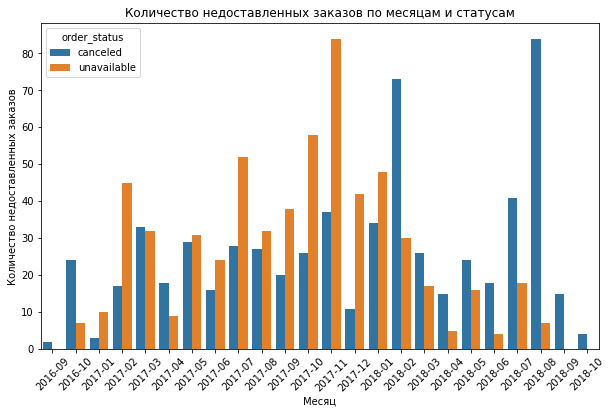

In [121]:
num_orders_per_month = num_orders_per_month.stack().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='num_orders', hue='order_status', data=num_orders_per_month)
plt.title('Количество недоставленных заказов по месяцам и статусам')
plt.xlabel('Месяц')
plt.ylabel('Количество недоставленных заказов')
plt.xticks(rotation=45)
plt.show()

### По каждому товару определить, в какой день недели товар чаще всего покупается.



In [122]:
# Объединение таблиц orders и order_items по order_id
full_orders = orders.merge(order_items, on = 'order_id') 

In [123]:
# Добавление нового столбца - извлечение дня недели
full_orders['weekday'] = full_orders['order_purchase_timestamp'].dt.strftime('%A')

In [124]:
# Группировка данных и подсчет количества покупок для каждого товара по дням недели
grouped_orders = full_orders.groupby(['product_id', 'weekday']) \
    .agg({'order_purchase_timestamp':'count'}) \
    .rename(columns={'order_purchase_timestamp':'num_orders'}) 

In [125]:
# Определение дня недели с максимальным количеством покупок для каждого товара
max_orders_per_product = grouped_orders.loc[grouped_orders.groupby('product_id')['num_orders'].idxmax()]

In [126]:
# Сортировка по количеству покупок в убывающем порядке для каждого товара
sorted_max_orders_per_product = max_orders_per_product.sort_values('num_orders', ascending=False)
sorted_max_orders_per_product.head()

,,num_orders
product_id,weekday,
422879e10f46682990de24d770e7f83d,Wednesday,93
99a4788cb24856965c36a24e339b6058,Monday,92
aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
368c6c730842d78016ad823897a372db,Friday,67


### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [127]:
# Объединение таблиц customers и orders по customer_id
cust_orders = customers.merge(orders, on='customer_id')

In [128]:
# Добавление нового столбца - извлечение месяца
cust_orders['month'] = cust_orders['order_purchase_timestamp'].dt.to_period('M')

In [129]:
# Группировка данных и подсчет количества покупок для каждого пользователя по месяцам
grouped_cust_orders = cust_orders.groupby(['customer_unique_id', 'month']) \
    .agg({'order_purchase_timestamp':'count'}) \
    .rename(columns={'order_purchase_timestamp':'num_orders'}) \
    .reset_index()

In [130]:
# Добавление нового столбца - количество недель в каждом месяце 
grouped_cust_orders['weeks_per_month'] = grouped_cust_orders.month.dt.days_in_month / 7
grouped_cust_orders.head()

,customer_unique_id,month,num_orders,weeks_per_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.428571
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.428571
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.285714


In [131]:
grouped_cust_orders['avg_orders_per_week'] = grouped_cust_orders.num_orders / grouped_cust_orders.weeks_per_month
grouped_cust_orders[['customer_unique_id', 'month', 'avg_orders_per_week']].head()

,customer_unique_id,month,avg_orders_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233333


### Выполните когортный анализ пользователей.

In [132]:
# Определение первой покупки для каждого пользователя
initial_purchase = pd.merge(customers, orders, on='customer_id') \
    .query('order_status == "delivered"') \
    [['customer_unique_id', 'order_approved_at']]
initial_purchase = initial_purchase.groupby('customer_unique_id').agg({'order_approved_at': 'min'}).reset_index()
initial_purchase = initial_purchase.rename(columns={'order_approved_at': 'first_purchase_date'})
initial_purchase.head()

,customer_unique_id,first_purchase_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52


In [133]:
# Создание основной таблицы для когортного анализа
cohort_data = pd.merge(customers, orders, on='customer_id')
cohort_data = cohort_data.dropna(subset=['order_approved_at'])
cohort_data['order_approved_at'] = pd.to_datetime(cohort_data['order_approved_at'])
cohort_data['cohort_start'] = cohort_data.groupby('customer_unique_id')['order_approved_at'].transform('min')
cohort_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,cohort_start
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-16 15:22:12
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01-12 20:58:32
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05-20 16:19:10
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03-13 17:29:19
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07-29 10:10:09


In [134]:
# Извлечение месяца из даты
cohort_data['purchase_month'] = cohort_data['order_purchase_timestamp'].dt.strftime('%Y-%m')
cohort_data['approval_month'] = cohort_data['order_approved_at'].dt.strftime('%Y-%m')
cohort_data['cohort_month'] = cohort_data['cohort_start'].dt.strftime('%Y-%m')

In [135]:
# Фильтрация данных
cohort_data = cohort_data.query('order_status == "delivered"') \
    .query("'2017-01' <= cohort_month <= '2017-12'") \
    .groupby(["cohort_month", "approval_month"]) \
    .agg({"customer_unique_id": "nunique"}).reset_index()

In [136]:
# Преобразование дат к формату периодов
cohort_data["cohort_month"] = pd.to_datetime(cohort_data["cohort_month"]).dt.to_period("M")
cohort_data["approval_month"] = pd.to_datetime(cohort_data["approval_month"]).dt.to_period("M")

In [137]:
# Вычисление периода
cohort_data['period_number'] = (cohort_data['approval_month'] - cohort_data['cohort_month']).apply(attrgetter('n'))
cohort_pivot = cohort_data.pivot_table(index='cohort_month', columns='period_number', values='customer_unique_id')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort_month,,,,,,,,,,,,,,,,,,,
2017-01,683.0,4.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1611.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN
2017-03,2510.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,9.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN
2017-04,2230.0,14.0,5.0,4.0,6.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN
2017-05,3453.0,19.0,18.0,13.0,11.0,12.0,15.0,6.0,9.0,9.0,10.0,12.0,7.0,2.0,7.0,9.0,NaN,NaN,NaN
2017-06,3043.0,15.0,11.0,12.0,8.0,10.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN
2017-07,3707.0,20.0,13.0,8.0,13.0,7.0,12.0,4.0,7.0,9.0,9.0,11.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN
2017-08,4078.0,28.0,15.0,11.0,15.0,21.0,11.0,11.0,5.0,7.0,10.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4024.0,27.0,20.0,13.0,17.0,11.0,9.0,9.0,13.0,7.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
# Вычисление коэффициента удержания
initial_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(initial_size, axis=0)

In [139]:
# Стилизация таблицы коэффициента удержания
styled_retention_table = (retention_matrix
                          .style
                          .set_caption('Коэффициент удержания пользователей по когортам')  
                          .background_gradient(cmap='coolwarm')  # Воспользуемся градиентной раскраской
                          .highlight_null('white') 
                          .format("{:.2%}", na_rep=""))  
styled_retention_table

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort_month,,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.59%,0.29%,0.15%,0.44%,0.15%,0.44%,0.15%,0.15%,,0.29%,0.29%,0.73%,0.44%,0.15%,0.15%,0.29%,0.44%,0.15%
2017-02,100.00%,0.25%,0.25%,0.19%,0.43%,0.12%,0.25%,0.19%,0.12%,0.25%,0.12%,0.31%,0.19%,0.19%,0.12%,0.06%,0.06%,0.25%,
2017-03,100.00%,0.52%,0.36%,0.36%,0.36%,0.16%,0.16%,0.32%,0.32%,0.12%,0.36%,0.12%,0.24%,0.12%,0.16%,0.24%,0.08%,0.16%,
2017-04,100.00%,0.63%,0.22%,0.18%,0.27%,0.27%,0.36%,0.27%,0.36%,0.18%,0.22%,0.09%,0.09%,0.04%,0.09%,0.09%,0.22%,,
2017-05,100.00%,0.55%,0.52%,0.38%,0.32%,0.35%,0.43%,0.17%,0.26%,0.26%,0.29%,0.35%,0.20%,0.06%,0.20%,0.26%,,,
2017-06,100.00%,0.49%,0.36%,0.39%,0.26%,0.33%,0.39%,0.23%,0.13%,0.23%,0.33%,0.36%,0.16%,0.13%,0.20%,,,,
2017-07,100.00%,0.54%,0.35%,0.22%,0.35%,0.19%,0.32%,0.11%,0.19%,0.24%,0.24%,0.30%,0.13%,0.24%,,,,,
2017-08,100.00%,0.69%,0.37%,0.27%,0.37%,0.51%,0.27%,0.27%,0.12%,0.17%,0.25%,0.17%,0.12%,,,,,,
2017-09,100.00%,0.67%,0.50%,0.32%,0.42%,0.27%,0.22%,0.22%,0.32%,0.17%,0.27%,0.07%,,,,,,,


### В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц.

In [140]:
# Выявление когорты с самым высоким retention на 3-й месяц
top_retention_cohort = retention_matrix[3].idxmax()
top_retention_value = retention_matrix[3].max()

print(f"Когорта с самым высоким retention на 3-й месяц: {top_retention_cohort}")
print(f"Значение retention: {round(top_retention_value * 100, 2)}%")

Когорта с самым высоким retention на 3-й месяц: 2017-06
Значение retention: 0.39%


###  Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [141]:
merged_data = pd.merge(customers, orders, on='customer_id')
merged_data = pd.merge(merged_data, order_items, on='order_id')

In [142]:
current_date = merged_data['order_purchase_timestamp'].max() + timedelta(days=1)

rfm_metrics = merged_data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,  # Recency
    'order_id': 'nunique',  # Frequency
    'price': 'sum'  # Monetary
}).reset_index()

rfm_metrics.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

In [143]:
# Функция для создания RFM сегментов
def create_rfm_segments(df):
    r_labels = range(4, 0, -1)
    f_labels = range(1, 5)
    m_labels = range(1, 5)

    r_bins = pd.qcut(df['recency'].rank(method='first'), q=4, labels=r_labels)
    f_bins = pd.qcut(df['frequency'].rank(method='first'), q=4, labels=f_labels)
    m_bins = pd.qcut(df['monetary'].rank(method='first'), q=4, labels=m_labels)

    df = df.assign(R=r_bins.values, F=f_bins.values, M=m_bins.values)

    return df

# Применение функции сегментации
rfm_segments = create_rfm_segments(rfm_metrics)

rfm_segments['RFM_Segment'] = rfm_segments['R'].astype(str) + rfm_segments['F'].astype(str) + rfm_segments['M'].astype(str)

rfm_segments['RFM_Score'] = rfm_segments[['R', 'F', 'M']].sum(axis=1)

rfm_segments

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_Segment,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3,413,8
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,6
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,4
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,4
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,214,7
...,...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00,1,4,4,144,9
95416,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,2,4,2,242,8
95417,ffff371b4d645b6ecea244b27531430a,573,1,89.90,1,4,3,143,8
95418,ffff5962728ec6157033ef9805bacc48,124,1,115.00,3,4,3,343,10


In [144]:
# Границы для каждого RFM сегмента
segments_info = rfm_segments.groupby('RFM_Segment').agg({
    'recency': ['min', 'max'],
    'frequency': ['min', 'max'],
    'monetary': ['min', 'max']
}).reset_index()

segments_info.columns = ['RFM_Segment', 'Recency_Min', 'Recency_Max', 'Frequency_Min', 'Frequency_Max', 'Monetary_Min', 'Monetary_Max']

segment_boundaries = {}
for _, row in segments_info.iterrows():
    segment_boundaries[row['RFM_Segment']] = {
        'recency_bounds': (row['Recency_Min'], row['Recency_Max']),
        'frequency_bounds': (row['Frequency_Min'], row['Frequency_Max']),
        'monetary_bounds': (row['Monetary_Min'], row['Monetary_Max'])
    }

# Вывод границ метрик для каждого RFM-сегмента
for segment, info in segment_boundaries.items():
    print(f'RFM-сегмент {segment}:')
    print(f'  Recency: от {info["recency_bounds"][0]} до {info["recency_bounds"][1]} дней')
    print(f'  Frequency: от {info["frequency_bounds"][0]} до {info["frequency_bounds"][1]} покупок')
    print(f'  Monetary: от {info["monetary_bounds"][0]:.2f} до {info["monetary_bounds"][1]:.2f} рублей')

RFM-сегмент 111:
  Recency: от 354 до 700 дней
  Frequency: от 1 до 1 покупок
  Monetary: от 3.90 до 47.90 рублей
RFM-сегмент 112:
  Recency: от 353 до 700 дней
  Frequency: от 1 до 1 покупок
  Monetary: от 47.90 до 89.90 рублей
RFM-сегмент 113:
  Recency: от 354 до 701 дней
  Frequency: от 1 до 1 покупок
  Monetary: от 89.90 до 155.00 рублей
RFM-сегмент 114:
  Recency: от 354 до 699 дней
  Frequency: от 1 до 1 покупок
  Monetary: от 155.40 до 3999.90 рублей
RFM-сегмент 121:
  Recency: от 353 до 700 дней
  Frequency: от 1 до 1 покупок
  Monetary: от 3.85 до 47.60 рублей
RFM-сегмент 122:
  Recency: от 353 до 729 дней
  Frequency: от 1 до 1 покупок
  Monetary: от 47.90 до 89.80 рублей
RFM-сегмент 123:
  Recency: от 353 до 718 дней
  Frequency: от 1 до 1 покупок
  Monetary: от 89.90 до 155.00 рублей
RFM-сегмент 124:
  Recency: от 353 до 699 дней
  Frequency: от 1 до 1 покупок
  Monetary: от 155.90 до 3980.00 рублей
RFM-сегмент 131:
  Recency: от 353 до 700 дней
  Frequency: от 1 до 1 поку

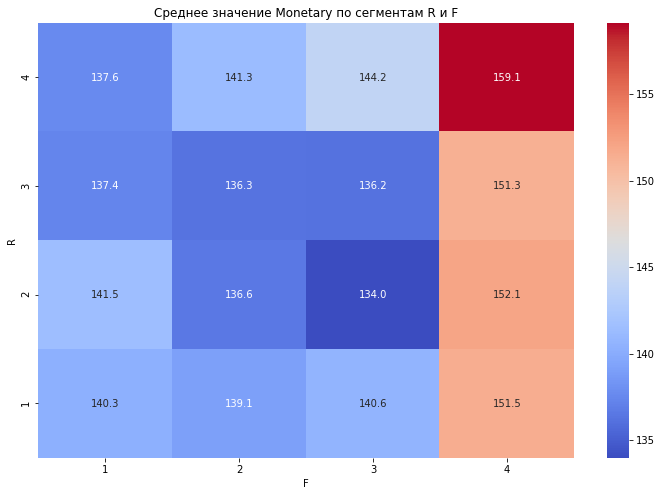

In [145]:
# Построение heatmap для RFM сегментов
plt.figure(figsize=(12, 8))
sns.heatmap(rfm_segments.pivot_table(index='R', columns='F', values='monetary', aggfunc='mean'),
            annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Среднее значение Monetary по сегментам R и F')
plt.show()

Вот выводы по RFM-сегментам на основе предоставленных данных:

##### Сегменты с высокой давностью покупок (Recency от 354 до 700 дней):

Клиенты в этих сегментах давно не покупали у нас товары или услуги.

Рекомендуется отправить им персонализированные предложения, чтобы вернуть их обратно.

##### Сегменты с одной покупкой (Frequency 1 покупка):

Эти клиенты сделали только одну покупку за весь период.

Важно предложить им специальные акции или скидки для стимулирования повторных покупок.

##### Сегменты с низкими затратами (Monetary от нескольких рублей до нескольких тысяч рублей):

Это клиенты, которые тратят немного или умеренно мало на наши продукты.

Можно предложить им дополнительные продукты или услуги, чтобы увеличить средний чек покупки.

